# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The main aims of the prac are: 

- to practice using tools for loading and viewing data sets;
- to visualise data in several ways and check for common pitfalls;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (20%)

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

In [2]:
### Your code here
##load data  from csv
rentals = pd.read_csv("SeoulBikeData.csv")


In [3]:
##summarise
rentals.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday,Yes


In [4]:
rentals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
rentals.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2)
count,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8760.000000,8759.000000,8760.000000
mean,704.602055,11.502740,12.914361,58.240183,1.953237,1436.442808,4.074369,0.569111
std,644.997468,6.922779,12.347109,20.584774,21.376612,608.827735,13.061011,0.868746
min,0.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,939.500000,-4.700000,0.000000
50%,504.500000,12.000000,13.700000,57.000000,1.500000,1697.500000,5.100000,0.010000
75%,1065.250000,18.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000


### 1.2 Initial visualisation

To get a feeling for the data it is a good idea to do some form of simple visualisation.  **Display a set of histograms for the features** as they are right now, prior to any cleaning steps.

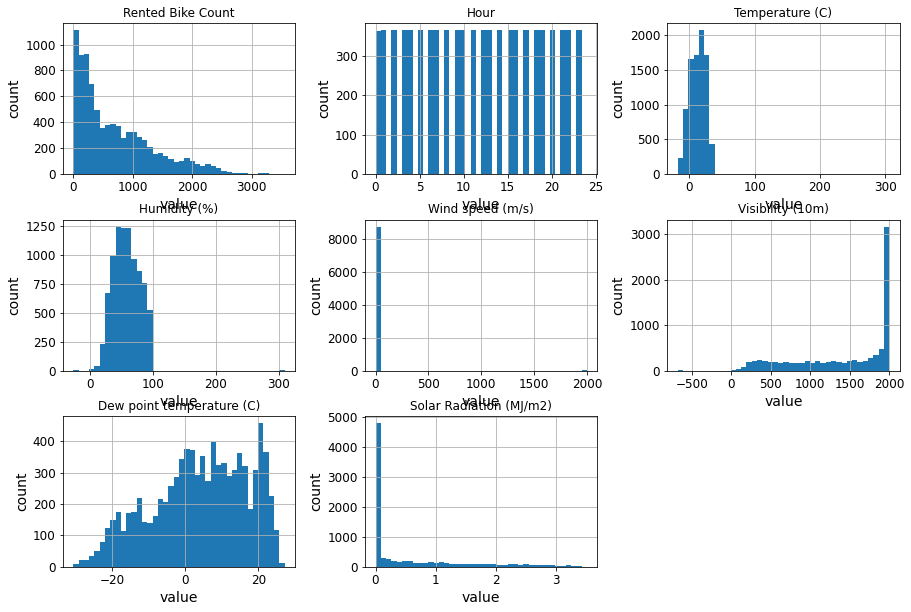

In [6]:
### Your code here
# use pd.hist to display the histograms 
rental_hists = rentals.hist(bins=40,figsize=(15,10))

for rental_hist in rental_hists.flatten():
    rental_hist.set_xlabel("value")
    rental_hist.set_ylabel("count")

#this can only display the histogram for numberic values, after cleaning data, it will show more hists

### 1.3 Removing unwanted information

The "Functioning day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so **remove rows from the DataFrame where the business is closed.** Hint: you can use the `DataFrame.loc()` function to do this. As a sanity check, ensure that the rows you are removing contain zero bike rentals! **After doing this, delete the Functioning Day feature from the DataFrame** and verify that this worked.

In [7]:
### Your code here

print(np.sum(rentals.isna() ))
#take the 13th column out
functioning_days = rentals.iloc[:,13]
#if functioning day == 'No', that's closed day
closed_days = functioning_days == 'No'
#set all the closed day as nan
rentals.iloc[closed_days,13] = np.nan
print("\nbefore replacing")
print("---------------------------------------------------------------------------------------------------------------")
print("after replacing\n")

print(np.sum(rentals.isna() ))#we see we have already setted 295 closing_days to nan

Date                         0
Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             1
Visibility (10m)             0
Dew point temperature (C)    1
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 2
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

before replacing
---------------------------------------------------------------------------------------------------------------
after replacing

Date                           0
Rented Bike Count              0
Hour                           0
Temperature (C)                0
Humidity (%)                   0
Wind speed (m/s)               1
Visibility (10m)               0
Dew point temperature (C)      1
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   2
Snowfall (cm)                  0
Seasons                        0
Holiday   

In [8]:
print("Before Drop")
rentals.info()
#drop the closed day rows
rentals.dropna(subset=['Functioning Day'],inplace = True) 
print("\nbefore dropping")
print("---------------------------------------------------------------------------------------------------------------")
print("after dropping\n")
rentals.info() # we can see that rows with nan value has been dropped


Before Drop
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8758 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8465 non-

In [9]:
#drop the functioning day column
rentals.drop(columns=['Functioning Day'],inplace=True)
rentals.info() # we can see that the Functioning Day col has been dropped
rentals.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage:

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,No Holiday


### 1.4 Numerical encoding

The main task is to predict future bike rental demand from this data. Hence the target feature is "Bike Rental Count". You will use regression techniques to do this, but this requires that the other features are numerical.

The Holiday and Season features both need to be converted to a simple numerical format. **Write code to convert the Holiday feature to 0 or 1 from its current format.** 

In [10]:
### Your code here
# No Holiday -> 0   Holiday -> 1

#take the 12th column out
holiday_col = rentals.iloc[:,12]
print(holiday_col)

#set Holiday to 1 and No Holiday to 0
holidays = holiday_col == 'Holiday'
rentals.iloc[holidays,12] = 1

holidays = holiday_col == 'No Holiday'
rentals.iloc[holidays,12] = 0

print("\nbefore replacing")
print("---------------------------------------------------------------------------------------------------------------")
print("after replacing\n")

print(holiday_col)#we see we holiday has been replaced by '0' and '1'

# make Holiday col numeric
rentals["Holiday"] = rentals["Holiday"].apply(pd.to_numeric,errors="coerce")
rentals.info() # we see the Holiday column become numeric
rentals.head()

0       No Holiday
1       No Holiday
2       No Holiday
3       No Holiday
4       No Holiday
           ...    
8755    No Holiday
8756    No Holiday
8757    No Holiday
8758    No Holiday
8759    No Holiday
Name: Holiday, Length: 8465, dtype: object

before replacing
---------------------------------------------------------------------------------------------------------------
after replacing

0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: Holiday, Length: 8465, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0


The Season feature is a little tricker. A number could be assigned to each season, but a better solution in this case is to **add 4 new columns**, each labelled by a season, and each storing 0 or 1 according to the season in each row. In other words, the "Winter" column contains 1 whenever the season is winter, and 0 elsewhere. **Do this for each season. Afterwards, remember to delete the Season feature.**

In [11]:
### Your code here
# use season col to make 4 new cols

#take the 11th (seasons) column out
season_col = rentals.iloc[:,11]

for season in ['Spring','Summer','Autumn','Winter']:
    #pick out a season and make a new column
    season_row = season_col == season
    #make a new column
    rentals[season] = 0
    #set this season's row to 1
    rentals[season].values[season_row] = 1



In [12]:
#see the summeries about current table
rentals.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   int64  
 13  Spring                     8465 non-null   int64

In [13]:
#other infos
rentals.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Spring,Summer,Autumn,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,Winter,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,Winter,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,Winter,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,Winter,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,Winter,0,0,0,0,1


In [14]:
rentals.describe()


,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Holiday,Spring,Summer,Autumn,Winter
count,8465.000000,8465.000000,8465.000000,8465.000000,8464.000000,8465.000000,8464.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.509864,12.803591,58.161607,1.962169,1433.477141,3.945558,0.567868,0.048198,0.255168,0.260839,0.228825,0.255168
std,642.351166,6.921101,12.515429,20.713601,21.744979,609.596083,13.243081,0.868245,0.214198,0.435982,0.439118,0.420101,0.435982
min,2.000000,0.000000,-17.800000,-26.000000,0.000000,-678.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1689.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,1.000000,1.000000,0.000000,1.000000
max,3556.000000,24.000000,306.000000,309.000000,2000.000000,2000.000000,27.200000,3.520000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
'''to check if the new columns are correct, we sum the mean value of the four seasons together to see if it is 1'''
print(rentals["Winter"].mean() + rentals["Autumn"].mean()+rentals["Summer"].mean()+rentals["Spring"].mean()) # we can see it's 1

1.0


In [16]:
#drop the season col
rentals.drop(columns=['Seasons'],inplace=True)
rentals.head()
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Holiday                    8465 non-null   int64  
 12  Spring                     8465 non-null   int64  
 13  Summer                     8465 non-null   int64

It is known that bike rentals depend strongly on whether it's a weekday or a weekend. **Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday.**  To do this, use the function `date_is_weekday` below, which returns 1 if it is a weekday and 0 if it is a weekend.

**Apply the function to the Date column in your DataFrame** (you can use `DataFrame.transform` to apply it).

In [17]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

### Your code to apply the function here:

#take the 0th (date) column out
date_col = rentals.iloc[:,0]
print(rentals['Date'].values[0])
is_week_day= [];
for n in range(len(date_col)):
    date = rentals['Date'].values[n]
    rentals['Date'].values[n] =date_is_weekday(date)
    
# for value in rentals['Date'].values:
#     print(value)#to check if the date is transformed correctly
# make date column to numeric
rentals['Date'] =  rentals["Date"].apply(pd.to_numeric,errors="coerce")
rentals.info()


01/12/2017
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8463 non-null   object 
 10  Snowfall (cm)              8465 non-null   object 
 11  Holiday                    8465 non-null   int64  
 12  Spring                     8465 non-null   int64  
 13  Summer                     8465 non-n

**Convert all the remaining data to numerical format**, with any non-numerical entries set to NaN.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8465 non-null   float64
 4   Humidity (%)               8465 non-null   int64  
 5   Wind speed (m/s)           8464 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8440 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Spring                     8465 non-null   int64  
 13  Summer                     8465 non-null   int64

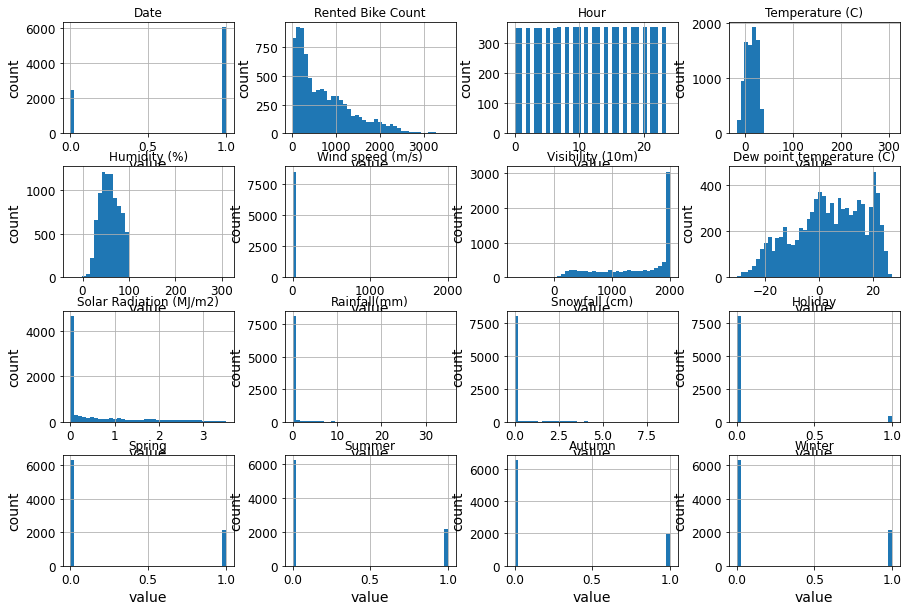

In [18]:
### Your code here
# print(rentals.head())
rentals = rentals.apply(pd.to_numeric,errors="coerce")
rentals.info() #all to muneric
rental_hists = rentals.hist(bins=40,figsize=(15,10))#all good
for rental_hist in rental_hists.flatten():
    rental_hist.set_xlabel("value")
    rental_hist.set_ylabel("count")

## Step 2: Visualise the data and perform further processing (20%)

### 2.1 Visualisation

Use **at least two graphical methods to display your data** and **identify** problematic entries. **Write one sentence** that summarises what you found about problematic entries.

In [19]:
#remove nan row before boxplotting
#this is just for plotting, but we want to impute it later. So we use a copy

rentals_copy = rentals.dropna()  


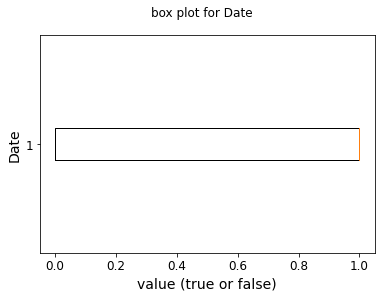

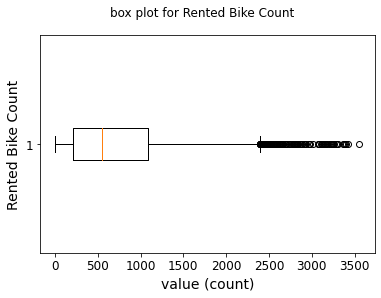

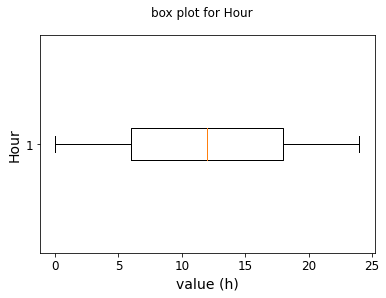

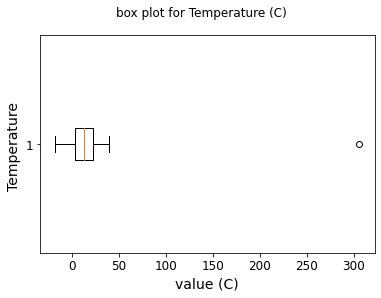

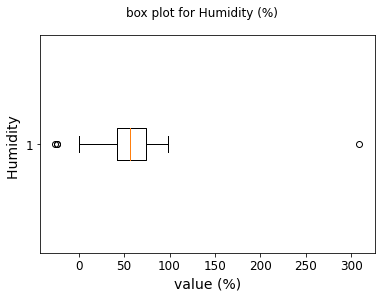

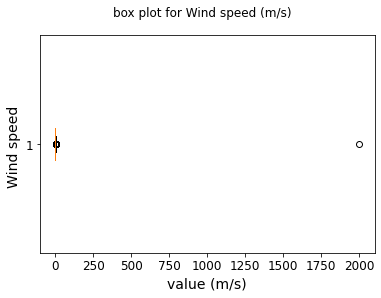

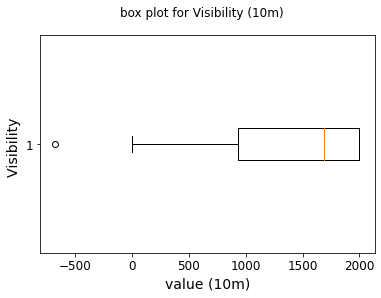

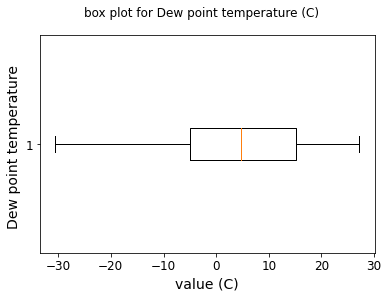

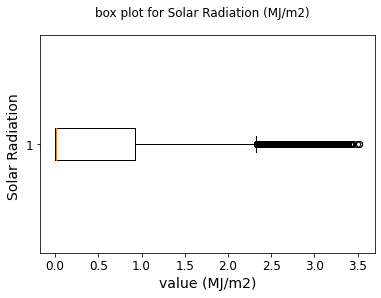

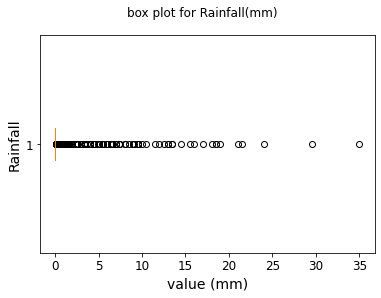

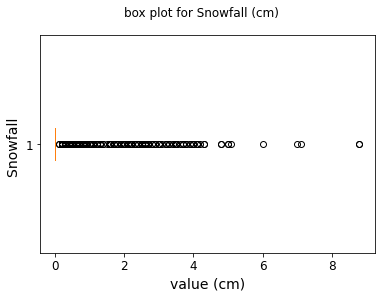

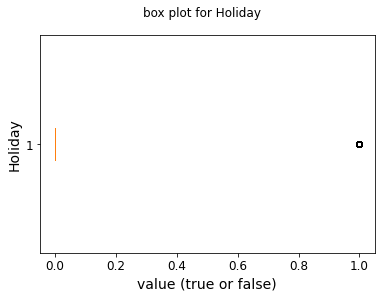

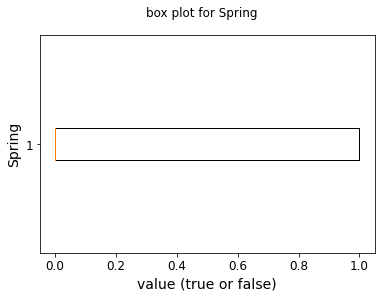

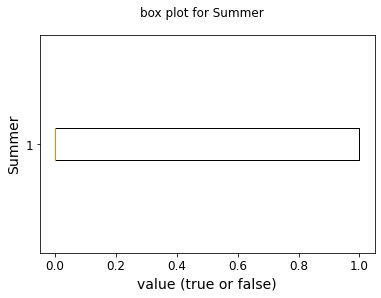

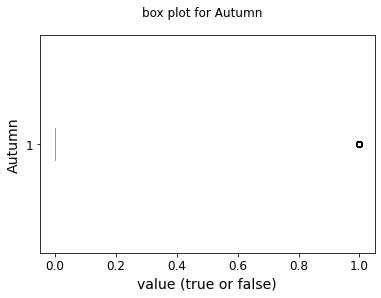

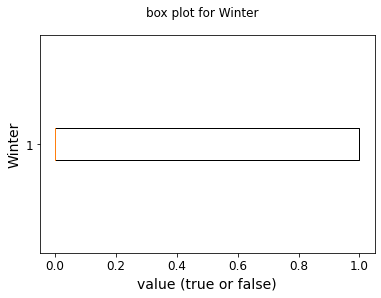

In [20]:
### Your code here
#visualise using boxplots
for n in range (rentals_copy.shape[1]):
    plt.boxplot(rentals_copy.iloc[:,n],vert =False)
    plt.suptitle( f'{"box plot for " +rentals_copy.columns[n]}'  )
    column_splited = rentals_copy.columns[n].split("(")
#     print(column_splited)
    plt.ylabel(f'{column_splited[0]}')
    #if the column name has the unit, add unit to x axis
    #or just print 'value'
    if len(column_splited) > 1:
        plt.xlabel("value ("+ f'{column_splited[1]}')
    else:
        # to make the lable mre clearer, manually deal with the unit
        if column_splited[0] == 'Rented Bike Count':
            plt.xlabel("value (count)")
        elif column_splited[0] == 'Hour':
            plt.xlabel("value (h)")
            
        else:
            plt.xlabel("value (true or false)")
        
    plt.show()

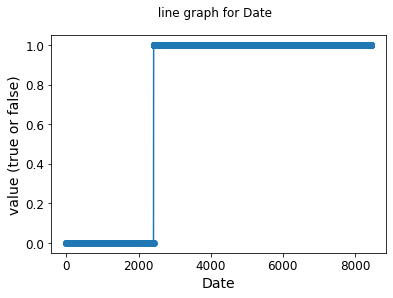

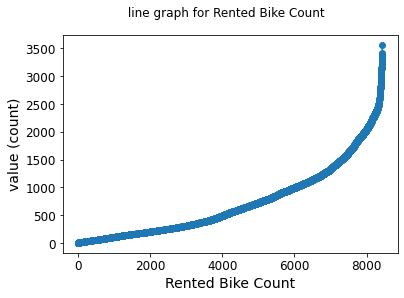

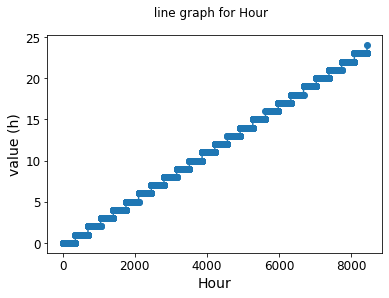

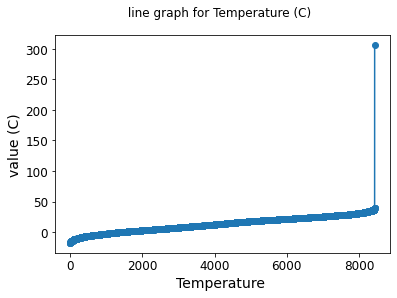

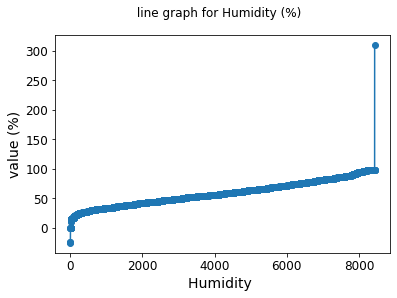

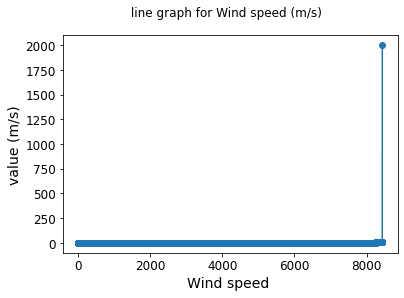

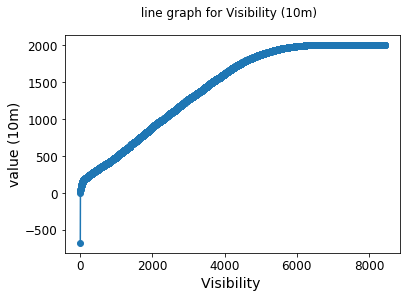

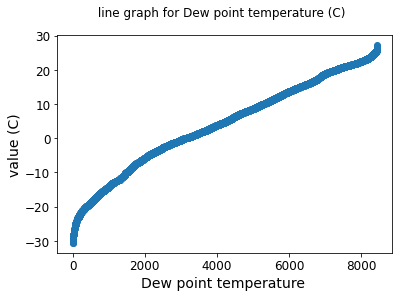

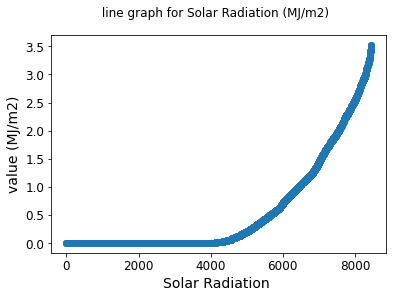

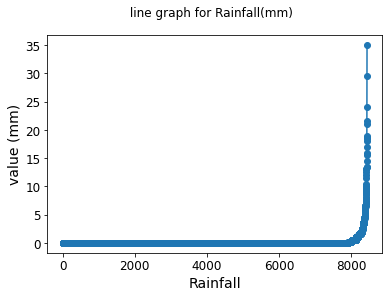

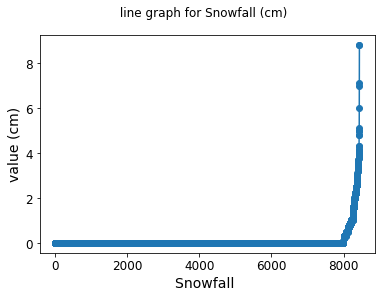

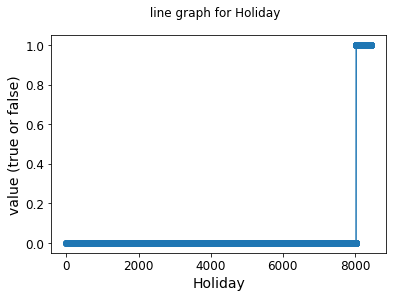

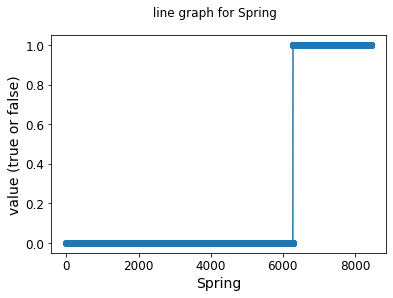

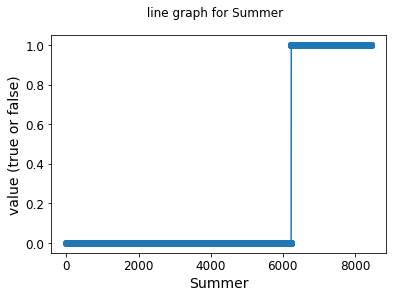

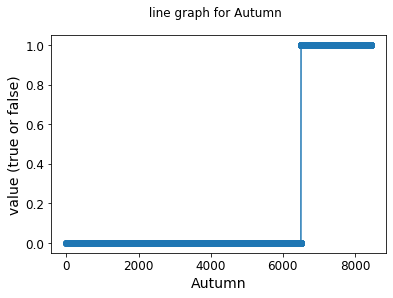

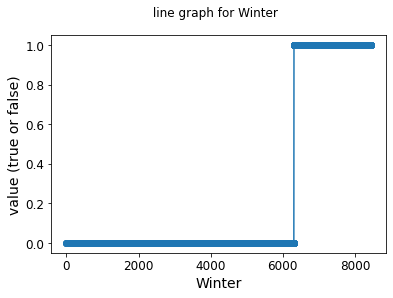

In [21]:
#visualise using sorted  in line graph
for n in range(rentals_copy.shape[1]):
    plt.plot(np.sort(rentals_copy.iloc[:,n]),'-o')
    plt.suptitle( f'{" line graph for " +rentals_copy.columns[n]}'  )
    column_splited = rentals_copy.columns[n].split("(")
#     print(column_splited)
    plt.xlabel(f'{column_splited[0]}')
    #if the column name has the unit, add unit to y axis
    if len(column_splited) > 1:
        plt.ylabel("value ("+ f'{column_splited[1]}')
    else:
        # to make the lable mre clearer, manually deal with the unit
        if column_splited[0] == 'Rented Bike Count':
            plt.ylabel("value (count)")
        elif column_splited[0] == 'Hour':
            plt.ylabel("value (h)")
            
        else:
            plt.ylabel("value (true or false)")
        
    plt.show()

In [22]:
### Your summary sentence about problematic entries
'''
'Temperature', 'Humidity', 'Wind speed',  'Visibility' contains obviously impossible values like Humidity is less than 0,
and 'Rented Bike Count','Solar Radiation','Rainfall', 'Snowfall' contains outliers.
'''

"\n'Temperature', 'Humidity', 'Wind speed',  'Visibility' contains obviously impossible values like Humidity is less than 0,\nand 'Rented Bike Count','Solar Radiation','Rainfall', 'Snowfall' contains outliers.\n"

### 2.2 Imputation and Pre-Processing

**Set any problematic values** in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

In [23]:
### Your code here

#fix  feature  1 (Temperature)
vals = rentals.iloc[:,3]
#set temperature larger than 50 to nan

bad_vals = vals >50
rentals.iloc[bad_vals,3] = np.nan
print(rentals.describe())
'''the max value of temperature becomes 39.4'''

              Date  Rented Bike Count         Hour  Temperature (C)  \
count  8465.000000        8465.000000  8465.000000      8464.000000   
mean      0.711636         729.156999    11.509864        12.768951   
std       0.453028         642.351166     6.921101        12.103538   
min       0.000000           2.000000     0.000000       -17.800000   
25%       0.000000         214.000000     6.000000         3.000000   
50%       1.000000         542.000000    12.000000        13.500000   
75%       1.000000        1084.000000    18.000000        22.700000   
max       1.000000        3556.000000    24.000000        39.400000   

       Humidity (%)  Wind speed (m/s)  Visibility (10m)  \
count   8465.000000       8464.000000       8465.000000   
mean      58.161607          1.962169       1433.477141   
std       20.713601         21.744979        609.596083   
min      -26.000000          0.000000       -678.000000   
25%       42.000000          0.900000        935.000000   
50%   

'the max value of temperature becomes 39.4'

In [24]:
#fix  feature  2 (Humidity)
vals = rentals.iloc[:,4]
#set humidity larger than 100 or less than 0 to nan
bad_vals = vals >100 
rentals.iloc[bad_vals,4] = np.nan
bad_vals = vals < 0 
rentals.iloc[bad_vals,4] = np.nan
print(rentals.describe())
'''the max value of temperature becomes 98 the least one become 0'''

              Date  Rented Bike Count         Hour  Temperature (C)  \
count  8465.000000        8465.000000  8465.000000      8464.000000   
mean      0.711636         729.156999    11.509864        12.768951   
std       0.453028         642.351166     6.921101        12.103538   
min       0.000000           2.000000     0.000000       -17.800000   
25%       0.000000         214.000000     6.000000         3.000000   
50%       1.000000         542.000000    12.000000        13.500000   
75%       1.000000        1084.000000    18.000000        22.700000   
max       1.000000        3556.000000    24.000000        39.400000   

       Humidity (%)  Wind speed (m/s)  Visibility (10m)  \
count   8461.000000       8464.000000       8465.000000   
mean      58.161328          1.962169       1433.477141   
std       20.478908         21.744979        609.596083   
min        0.000000          0.000000       -678.000000   
25%       42.000000          0.900000        935.000000   
50%   

'the max value of temperature becomes 98 the least one become 0'

In [25]:
#fix  feature  3 (Wind Speed)
vals = rentals.iloc[:,5]
#set wind speed larger than 30 to nan

bad_vals = vals >30
rentals.iloc[bad_vals,5] = np.nan
print(rentals.describe())
'''the max value of temperature becomes 7.4'''

              Date  Rented Bike Count         Hour  Temperature (C)  \
count  8465.000000        8465.000000  8465.000000      8464.000000   
mean      0.711636         729.156999    11.509864        12.768951   
std       0.453028         642.351166     6.921101        12.103538   
min       0.000000           2.000000     0.000000       -17.800000   
25%       0.000000         214.000000     6.000000         3.000000   
50%       1.000000         542.000000    12.000000        13.500000   
75%       1.000000        1084.000000    18.000000        22.700000   
max       1.000000        3556.000000    24.000000        39.400000   

       Humidity (%)  Wind speed (m/s)  Visibility (10m)  \
count   8461.000000       8463.000000       8465.000000   
mean      58.161328          1.726078       1433.477141   
std       20.478908          1.034324        609.596083   
min        0.000000          0.000000       -678.000000   
25%       42.000000          0.900000        935.000000   
50%   

'the max value of temperature becomes 7.4'

In [26]:
#fix  feature  4 (Visibility)
vals = rentals.iloc[:,6]
#set visibility smaller than 0 to nan

bad_vals = vals < 0
rentals.iloc[bad_vals,6] = np.nan
print(rentals.describe())
'''the min value of temperature becomes 1'''

              Date  Rented Bike Count         Hour  Temperature (C)  \
count  8465.000000        8465.000000  8465.000000      8464.000000   
mean      0.711636         729.156999    11.509864        12.768951   
std       0.453028         642.351166     6.921101        12.103538   
min       0.000000           2.000000     0.000000       -17.800000   
25%       0.000000         214.000000     6.000000         3.000000   
50%       1.000000         542.000000    12.000000        13.500000   
75%       1.000000        1084.000000    18.000000        22.700000   
max       1.000000        3556.000000    24.000000        39.400000   

       Humidity (%)  Wind speed (m/s)  Visibility (10m)  \
count   8461.000000       8463.000000       8464.000000   
mean      58.161328          1.726078       1433.726607   
std       20.478908          1.034324        609.199826   
min        0.000000          0.000000          1.000000   
25%       42.000000          0.900000        935.000000   
50%   

'the min value of temperature becomes 1'

In [27]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   int64  
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature (C)            8464 non-null   float64
 4   Humidity (%)               8461 non-null   float64
 5   Wind speed (m/s)           8463 non-null   float64
 6   Visibility (10m)           8464 non-null   float64
 7   Dew point temperature (C)  8464 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8440 non-null   float64
 10  Snowfall (cm)              8442 non-null   float64
 11  Holiday                    8465 non-null   int64  
 12  Spring                     8465 non-null   int64  
 13  Summer                     8465 non-null   int64

In [28]:
# #remove all the outliers
cols = [1,3,4,5,6,8,9,10] # one or more

rentals.iloc[:,cols] = rentals.iloc[:,cols].mask(rentals.iloc[:,cols].sub(rentals.iloc[:,cols].mean()).div(rentals.iloc[:,cols].std()).abs().gt(2))
rentals = rentals.replace({pd.NA: np.nan})
rentals.dropna(subset=['Rented Bike Count'], inplace=True)  

print(rentals.describe())

              Date  Rented Bike Count         Hour  Temperature (C)  \
count  7995.000000        7995.000000  7995.000000      7826.000000   
mean      0.707942         633.357098    11.162727        12.525428   
std       0.454737         515.596976     6.913719        11.597524   
min       0.000000           2.000000     0.000000       -11.400000   
25%       0.000000         203.000000     5.000000         3.000000   
50%       1.000000         483.000000    11.000000        12.600000   
75%       1.000000         987.000000    17.000000        21.900000   
max       1.000000        2013.000000    24.000000        36.900000   

       Humidity (%)  Wind speed (m/s)  Visibility (10m)  \
count   7901.000000       7611.000000       7803.000000   
mean      59.049361          1.573591       1450.338203   
std       20.237735          0.866371        588.993597   
min       18.000000          0.000000        216.000000   
25%       43.000000          0.900000        962.000000   
50%   

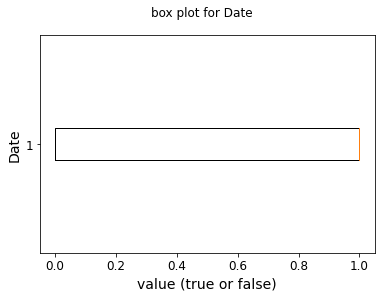

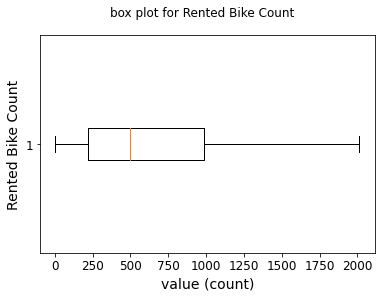

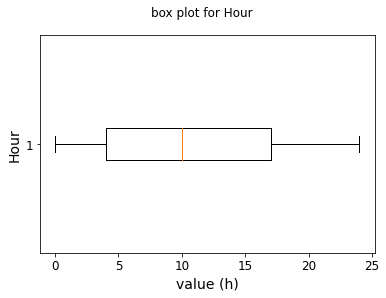

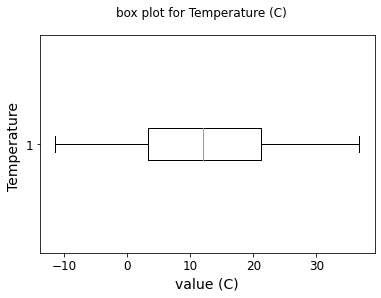

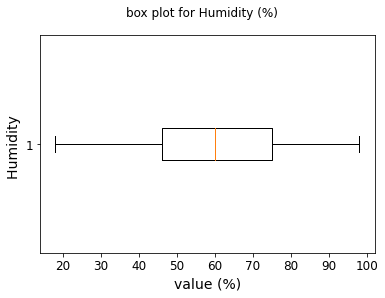

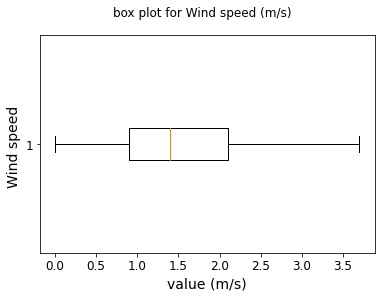

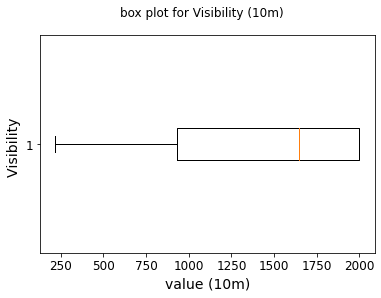

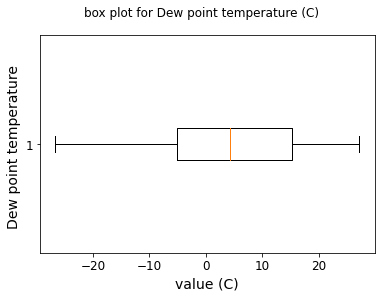

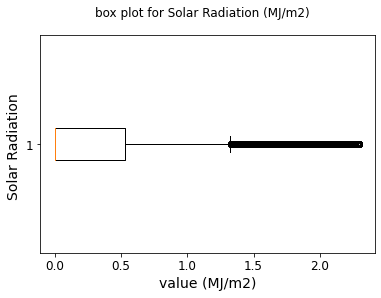

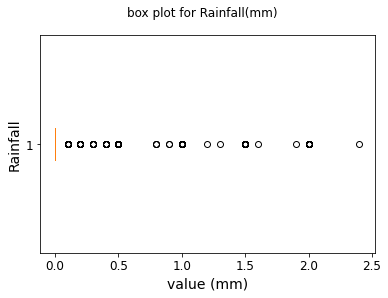

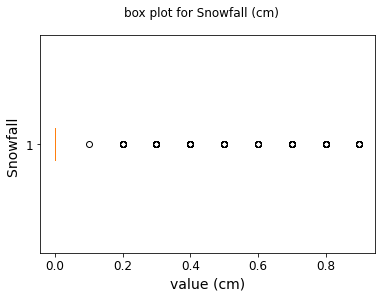

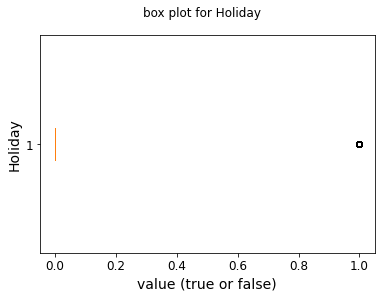

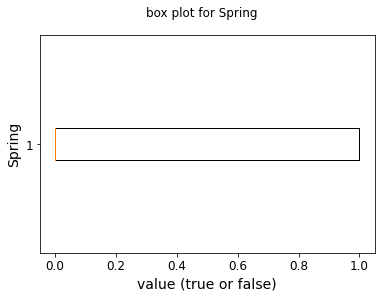

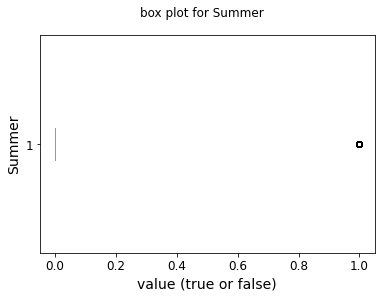

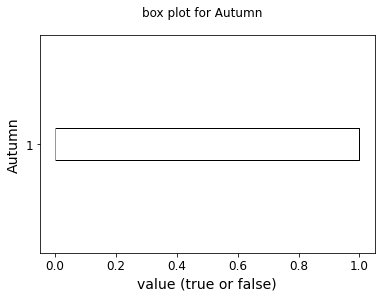

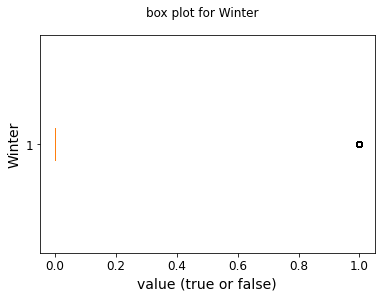

In [29]:
#remove nan row before boxplotting
#this is just for plotting, but we want to impute it later. So we use a copy

rentals_copy = rentals.dropna()  


### Your code here
#visualise using boxplots
for n in range (rentals_copy.shape[1]):
    plt.boxplot(rentals_copy.iloc[:,n],vert =False)
    plt.suptitle( f'{"box plot for " +rentals_copy.columns[n]}'  )
    column_splited = rentals_copy.columns[n].split("(")
#     print(column_splited)
    plt.ylabel(f'{column_splited[0]}')
    #if the column name has the unit, add unit to x axis
    #or just print 'value'
    if len(column_splited) > 1:
        plt.xlabel("value ("+ f'{column_splited[1]}')
    else:
        # to make the lable mre clearer, manually deal with the unit
        if column_splited[0] == 'Rented Bike Count':
            plt.xlabel("value (count)")
        elif column_splited[0] == 'Hour':
            plt.xlabel("value (h)")
            
        else:
            plt.xlabel("value (true or false)")
        
    plt.show()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature (C)              169
Humidity (%)                  94
Wind speed (m/s)             384
Visibility (10m)             192
Dew point temperature (C)      1
Solar Radiation (MJ/m2)      631
Rainfall(mm)                 171
Snowfall (cm)                250
Holiday                        0
Spring                         0
Summer                         0
Autumn                         0
Winter                         0
dtype: int64


"it's good"

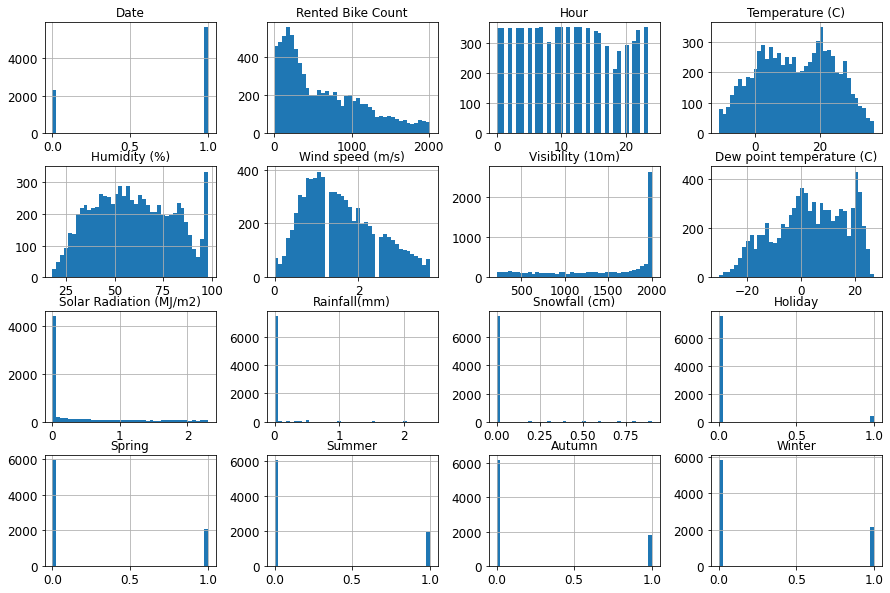

In [30]:
#plot again to see if it performs right
print(np.sum(rentals.isna() ))
rentals.hist(bins=40,figsize=(15,10)) 
'''it's good'''

In [31]:

#Once this is done, specify a sklearn pipeline that will perform imputation to replace problematic entries (nan values) with an appropriate 
#median value and any other pre-processing that you think should be used. Just specify the pipeline - do not run it now.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#we use a simpleImputer to set nan to median and use StandardScaler to scale the data
process_pl = Pipeline( [('imputer',SimpleImputer(missing_values=np.nan,strategy = "median")),
                  ('std_scaler',StandardScaler() )])


### 2.3 Correlation 

It is also useful to look at how strongly correlated the features are to the desired target (Rented Bike Count). Before anything else is done it is necessary to **fit and apply the pipeline** above to make a *temporary* version of the whole dataset that is pre-processed. **Why is it important to not use this version of the pre-processed data again?**

In [32]:
### Your code here


#fit and apply the pipeliney
rentals_p = process_pl.fit_transform(rentals)
# print(np.sum(np.isnan(rentals_p) ))
# print(np.any(np.isnan(rentals_p)))


print(rentals_p.shape)

(7995, 16)


In [33]:
### Your written answer here
'''We should protect a original version of dataset before pre-processed because we may apply new preprosses later.'''

'We should protect a original version of dataset before pre-processed because we may apply new preprosses later.'

To visualise the strength of the relationships, display a **scatter plot** for each feature (separately) vs the target variable.  Also **calculate the correlation** of each feature with the target (Hint: pandas function `corr()` or numpy `corrcoef()`). **Which 3 attributes are the most correlated with bike rentals?**

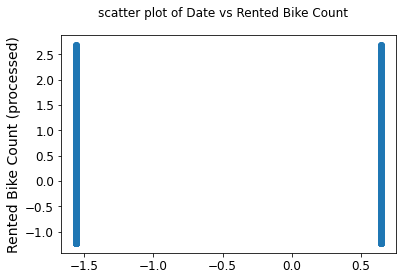

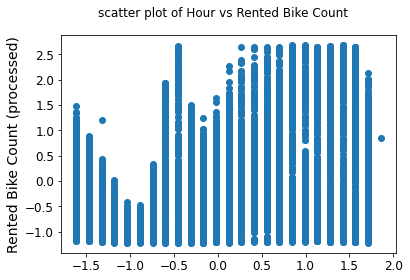

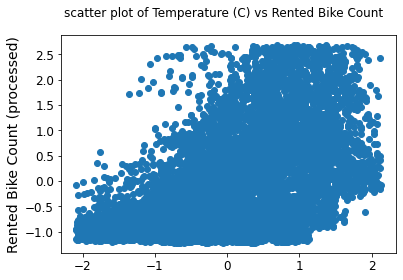

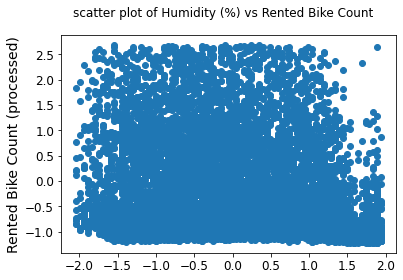

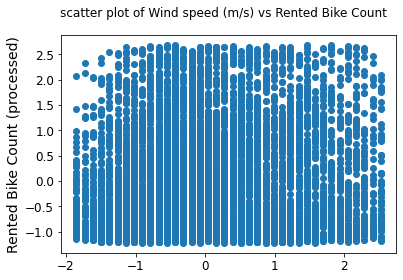

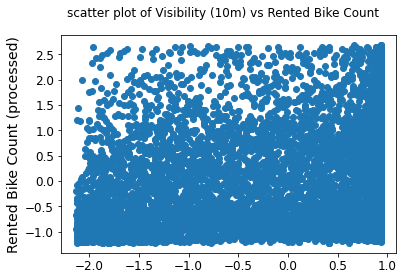

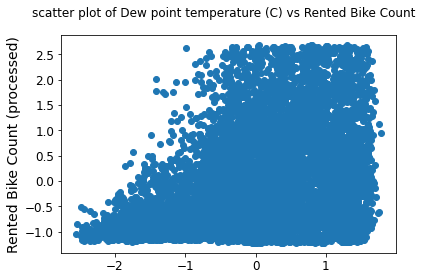

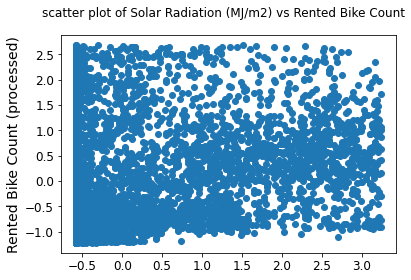

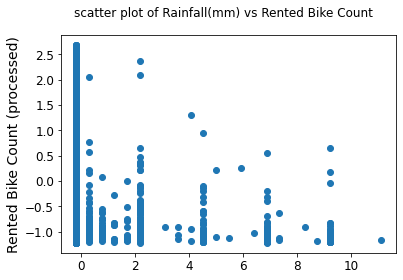

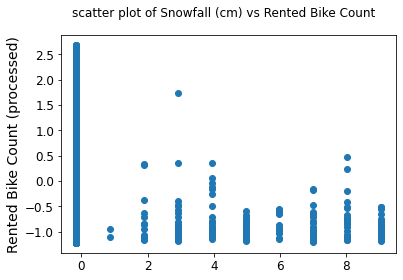

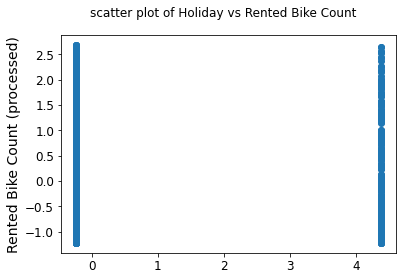

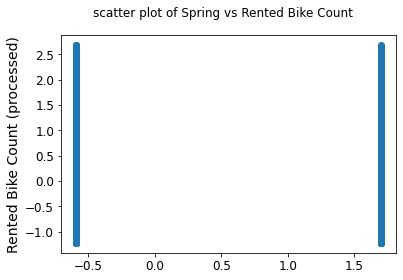

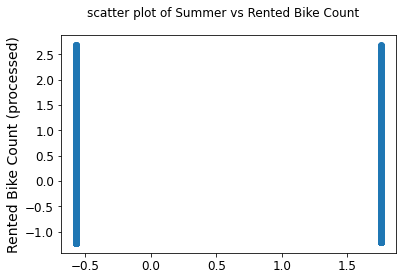

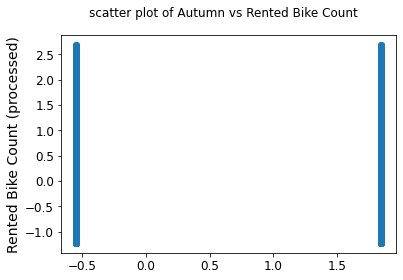

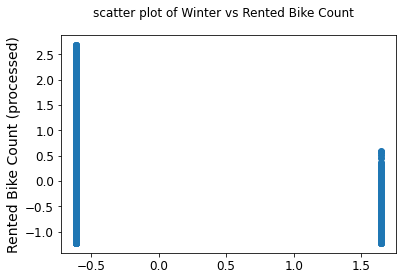

In [34]:
### Your code here
#make a new df to store processed data
rentals_processed = pd.DataFrame(rentals_p, columns = rentals.columns)

# then split the X y
X = rentals_processed.drop(["Rented Bike Count"],axis =1)
y = rentals_processed["Rented Bike Count"].copy()
for column in X.columns:
    plt.suptitle(f'scatter plot of {column} vs Rented Bike Count')
    column_splited = rentals.columns[n].split("(")
#     print(column_splited)
    plt.ylabel("Rented Bike Count (processed)")
    #if the column name has the unit, add unit to x axis
    #or just print 'value'
    if len(column_splited) > 1:
        plt.xlabel(f'{column}')
    plt.scatter(X[column],y )
    plt.show()
# plt.plot(y_train,y_train,'r-o')

In [35]:
#calculate the correlation
for column in X.columns:
    corr = rentals_processed[column].corr(rentals_processed['Rented Bike Count'])
    print(f'the correlation between {column} and Rented Bike Count is : {corr}')
 

the correlation between Date and Rented Bike Count is : 0.026094169876357046
the correlation between Hour and Rented Bike Count is : 0.3918439597288353
the correlation between Temperature (C) and Rented Bike Count is : 0.548353810704363
the correlation between Humidity (%) and Rented Bike Count is : -0.20700345922807184
the correlation between Wind speed (m/s) and Rented Bike Count is : 0.14331299349764404
the correlation between Visibility (10m) and Rented Bike Count is : 0.15471296988224228
the correlation between Dew point temperature (C) and Rented Bike Count is : 0.3927453380351034
the correlation between Solar Radiation (MJ/m2) and Rented Bike Count is : 0.21377080574275645
the correlation between Rainfall(mm) and Rented Bike Count is : -0.16555439654681536
the correlation between Snowfall (cm) and Rented Bike Count is : -0.13368540714102628
the correlation between Holiday and Rented Bike Count is : -0.06449272002285067
the correlation between Spring and Rented Bike Count is : 0.

In [36]:
### Your written answers here
'''
from the correlations above, we see the Temperature,Winter, Hour are the most correlated with bike rentals
because they have the correlation value the closest to 1(or -1)
'''

'\nfrom the correlations above, we see the Temperature,Winter, Hour are the most correlated with bike rentals\nbecause they have the correlation value the closest to 1(or -1)\n'

## Step 3: Predicting bike rentals (25%)

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (rmse) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Build a pipeline** starting with the one specified in section 2.2 above, and now include a ***linear regression* model**. After you've done this, **fit** this to your training data for a quick test. To get an idea of how successful this model is, **calculate the rmse of the fit to the training data**. To act as a simple baseline for comparison, **also calculate the rmse** that you would get if all the predictions were equal to the **mean of the training targets** (i.e. bike rentals).


In [37]:
### Your code here
#Split the data appropriately so that 20% of it will be kept as a hold-out test set. 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(rentals, test_size=0.2, random_state=42)
#split the X and y for train and test data
X_train = train_set.drop(["Rented Bike Count"],axis =1)
y_train = train_set["Rented Bike Count"].copy()
X_test  = test_set.drop(["Rented Bike Count"],axis=1)
y_test  = test_set["Rented Bike Count"].copy()



In [38]:
#Build a pipeline starting with the one specified in section 2.2 above, and now include a linear regression model.
#we use a simpleImputer to set nan to median and use StandardScaler to scale the data
from sklearn.linear_model import LinearRegression

lr_pl = Pipeline( [('imputer',SimpleImputer(strategy = "median")),
                  ('std_scaler',StandardScaler() ),('lr',LinearRegression())])



Show an appropriate **visualisation of the fit for your linear regression.**

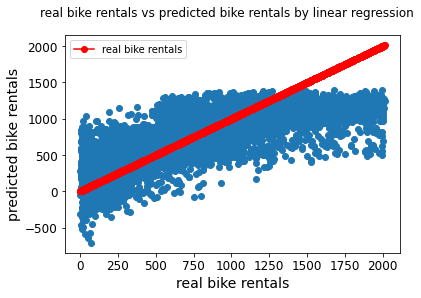

In [39]:
### Your code here
#fit the linear regression
lr_pl.fit(X_train,y_train)
y_pred = lr_pl.predict(X_train)

#visualisation
plt.suptitle("real bike rentals vs predicted bike rentals by linear regression")
plt.xlabel("real bike rentals")
plt.ylabel("predicted bike rentals")
plt.scatter(y_train,y_pred)
plt.plot(y_train,y_train,'r-o', label = "real bike rentals")
plt.legend()
plt.show()

In [40]:
#calculate the rmse of the fit to the training data. 
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(y_pred,y_train))
print(rmse_lr) #437.2957308414973
#calculate the rmse that you would get if all the predictions were equal to the mean of the training targets (i.e. bike rentals).
mock_y_pred = pd.Series([y_train.mean()]*len(y_train.values))
rmse_mock_lr = np.sqrt(mean_squared_error(mock_y_pred,y_train))
print(rmse_mock_lr) #646.170499547999

'''fitting with leanear regression model is better than just using mean value because it has smaller rmse'''

342.26190415270077
515.6916120115031


'fitting with leanear regression model is better than just using mean value because it has smaller rmse'

Now two other, different regression models (that you probably won't be familiar with) will be fit and later these will be compared to find the best one.

The second model to fit is ***Kernel Ridge*** regression (`from sklearn.kernel_ridge import KernelRidge`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

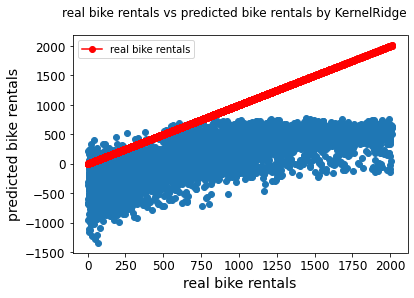

719.1748913398326


In [41]:
### Your code here
from sklearn.kernel_ridge import KernelRidge
#make the pipeline
krr_pl = Pipeline( [('imputer',SimpleImputer(strategy = "median")),
                  ('std_scaler',StandardScaler() ),('krr',KernelRidge())])

#fit the krr
krr_pl.fit(X_train,y_train)
y_pred_krr = krr_pl.predict(X_train)

#visualisation
plt.suptitle("real bike rentals vs predicted bike rentals by KernelRidge")
plt.xlabel("real bike rentals")
plt.ylabel("predicted bike rentals")
plt.scatter(y_train,y_pred_krr)
plt.plot(y_train,y_train,'r-o', label = "real bike rentals")
plt.legend()
plt.show()

#calculate the rmse of the fit to the training data. 

rmse_krr = np.sqrt(mean_squared_error(y_pred_krr,y_train))
print(rmse_krr) 

The third, and most powerful model, is ***Support Vector Regression*** (`from sklearn.svm import SVR`). **Build a pipeline using this and fit it to your training data**, using the default settings. Again, **plot the fit and display the rmse for the training dataset.**

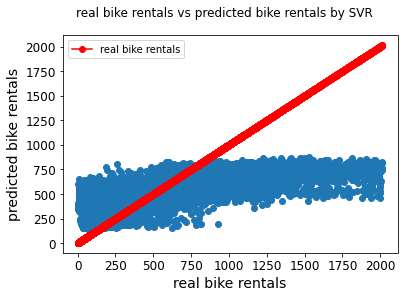

418.52717323978175


In [42]:
### Your code here
from sklearn.svm import SVR
#make the pipeline
svr_pl = Pipeline( [('imputer',SimpleImputer(strategy = "median")),
                  ('std_scaler',StandardScaler() ),('svr',SVR())])

#fit the krr
svr_pl.fit(X_train,y_train)
y_pred_svr = svr_pl.predict(X_train)

#visualisation
plt.suptitle("real bike rentals vs predicted bike rentals by SVR")
plt.xlabel("real bike rentals")
plt.ylabel("predicted bike rentals")
plt.scatter(y_train,y_pred_svr)
plt.plot(y_train,y_train,'r-o', label = "real bike rentals")
plt.legend()
plt.show()

#calculate the rmse of the fit to the training data. 

rmse_svr = np.sqrt(mean_squared_error(y_pred_svr,y_train))
print(rmse_svr) 

## Step 4: Cross validation (20%)

**Perform a *10 fold cross validation* for each model.** This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run.

**Display the mean and standard deviation of the rmse values** obtained for each model **for the validation splits** using the same settings/parameters for the models as used above. **Also display the mean and standard deviation** of the rmse values obtained for the **training data splits**.

In [43]:
### Your code here

#10-fold cross vaidation for linear regression
from sklearn.model_selection import KFold
val_rmses=[];
train_rmses=[];
kf = KFold(n_splits =10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr,X_val =X_train.iloc[train_index],X_train.iloc[val_index]
    y_trainr,y_val =y_train.iloc[train_index],y_train.iloc[val_index]
    
    #pridict validate set
    lr_pl.fit(X_trainr,y_trainr)
    y_pred = lr_pl.predict(X_val)
    rmse_lr = np.sqrt(mean_squared_error(y_pred,y_val))
    val_rmses.append(rmse_lr)
    
    #predict train set
    y_pred = lr_pl.predict(X_trainr)
    rmse_lr = np.sqrt(mean_squared_error(y_pred,y_trainr))
    train_rmses.append(rmse_lr)

print("For the linear regression model:")
print(f"The mean of the validation split's rmse is : {np.mean(val_rmses)}, \nthe standard deviation  of the validation split's rmse is : {np.std(val_rmses)} ")
print(f"The mean of the training split's rmse is : {np.mean(train_rmses)}, \nthe standard deviation  of the training split's rmse is : {np.std(train_rmses)} ")


For the linear regression model:
The mean of the validation split's rmse is : 342.8231555376105, 
the standard deviation  of the validation split's rmse is : 12.333853464329598 
The mean of the training split's rmse is : 342.21624670175385, 
the standard deviation  of the training split's rmse is : 1.377432505411076 


In [44]:
### Your code here

#10-fold cross vaidation for krr(KernelRidge)
val_rmses=[];
train_rmse=[];
kf = KFold(n_splits =10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr,X_val =X_train.iloc[train_index],X_train.iloc[val_index]
    y_trainr,y_val =y_train.iloc[train_index],y_train.iloc[val_index]
    
    #pridict validate set
    krr_pl.fit(X_trainr,y_trainr)
    y_pred = krr_pl.predict(X_val)
    rmse_krr = np.sqrt(mean_squared_error(y_pred,y_val))
    val_rmses.append(rmse_krr)
    
    #predict train set
    y_pred = krr_pl.predict(X_trainr)
    rmse_krr = np.sqrt(mean_squared_error(y_pred,y_trainr))
    train_rmses.append(rmse_krr)

print("For the KernelRidge model:")
print(f"The mean of the validation split's rmse is : {np.mean(val_rmses)}, \nthe standard deviation  of the validation split's rmse is : {np.std(val_rmses)} ")
print(f"The mean of the training split's rmse is : {np.mean(train_rmses)}, \nthe standard deviation  of the training split's rmse is : {np.std(train_rmses)} ")


For the KernelRidge model:
The mean of the validation split's rmse is : 719.3456977314243, 
the standard deviation  of the validation split's rmse is : 15.933169864530207 
The mean of the training split's rmse is : 530.6852494319978, 
the standard deviation  of the training split's rmse is : 188.48151645327528 


In [45]:
### Your code here

#10-fold cross vaidation for svr (Support Vector Regression )
from sklearn.model_selection import KFold
val_rmses=[];
train_rmse=[];
kf = KFold(n_splits =10)
kf.get_n_splits(X_train)
for train_index, val_index in kf.split(X_train):
    X_trainr,X_val =X_train.iloc[train_index],X_train.iloc[val_index]
    y_trainr,y_val =y_train.iloc[train_index],y_train.iloc[val_index]
    
    #pridict validate set
    svr_pl.fit(X_trainr,y_trainr)
    y_pred = svr_pl.predict(X_val)
    rmse_svr = np.sqrt(mean_squared_error(y_pred,y_val))
    val_rmses.append(rmse_svr)
    
    #predict train set
    y_pred = svr_pl.predict(X_trainr)
    rmse_svr = np.sqrt(mean_squared_error(y_pred,y_trainr))
    train_rmses.append(rmse_svr)

print("For the Support Vector Regression  model:")
print(f"The mean of the validation split's rmse is : {np.mean(val_rmses)}, \nthe standard deviation  of the validation split's rmse is : {np.std(val_rmses)} ")
print(f"The mean of the training split's rmse is : {np.mean(train_rmses)}, \nthe standard deviation  of the training split's rmse is : {np.std(train_rmses)} ")


For the Support Vector Regression  model:
The mean of the validation split's rmse is : 425.60322133110776, 
the standard deviation  of the validation split's rmse is : 14.371415744058412 
The mean of the training split's rmse is : 495.53991441909443, 
the standard deviation  of the training split's rmse is : 161.7237442321717 


On the basis of the results you found above, would you say that any of the models were **under-fitting or over-fitting**?  

**Which method do you think is the best** out of these three?

In [46]:
### Your answer here
'''They are all underfitting because the training set and validation set errors are all high and the fit of rental count prediction and real rental count are obviously bad.'''
'''The linear regression model is the best out of these three beause it has the lowest training error and validation error'''

'The linear regression model is the best out of these three beause it has the lowest training error and validation error'

## Step 5: Grid parameter search (15%)

Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. **Choose either the KernelRidge or SVR** (your choice entirely), and use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function `GridSearchCV` to do this. 

For KernelRidge, vary the hyperparameter `alpha`.

For SVR, vary the hyperparameter `C`.

**Print out the hyperparameter setting** for the best (i.e. chosen) method. 

Finally, **train and apply your chosen method**, with appropriate hyperparameter settings, to the ***test set* and report the performance**. 

In [47]:
### Your code here

from sklearn.model_selection import GridSearchCV
parameters = {'svr__C': [1, 10, 100, 1000,10000]}
gridcv = GridSearchCV(svr_pl, parameters, cv=10, scoring='neg_root_mean_squared_error')
gridcv.fit(X_train, y_train)
print(f'Best score is {-gridcv.best_score_} for best params of {gridcv.best_params_}')  

Best score is 223.3096230025789 for best params of {'svr__C': 10000}


**How different was the test set performance to the validation performance, and is this suggestive of over-fitting, under-fitting or neither?**

In [48]:
### Your answers here
svr_pl2 = Pipeline( [('imputer',SimpleImputer(strategy = "median")),
                  ('std_scaler',StandardScaler() ),('svr',SVR(C = 10000))])




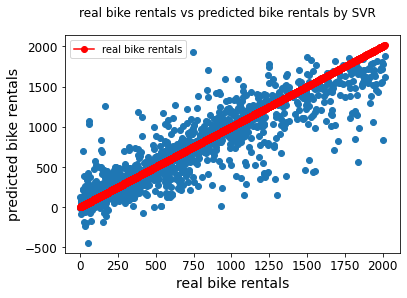

224.26077347090134


In [49]:

#testing
#fit the svr2
svr_pl2.fit(X_train,y_train)
y_pred_svr2 = svr_pl2.predict(X_test)

#visualisation
plt.suptitle("real bike rentals vs predicted bike rentals by SVR")
plt.xlabel("real bike rentals")
plt.ylabel("predicted bike rentals")
plt.scatter(y_test,y_pred_svr2)
plt.plot(y_train,y_train,'r-o', label = "real bike rentals")
plt.legend()
plt.show()

#calculate the rmse of the fit to the training data. 

rmse_svr = np.sqrt(mean_squared_error(y_pred_svr2,y_test))
print(rmse_svr) 

In [50]:
'''
The accurency of predicted result improves much from the previous SVR model because it has half smaller rmse and better fitting that can be seen obviously from the plot.
However the run time become much longer than before.
The SVR model with C value of 10000 is not under-fitting/over-fitting.
'''

'\nThe accurency of predicted result improves much from the previous SVR model because it has half smaller rmse and better fitting that can be seen obviously from the plot.\nHowever the run time become much longer than before.\nThe SVR model with C value of 10000 is not under-fitting/over-fitting.\n'